In [14]:
import numpy as np
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt

In [12]:
# load the data
data = pd.read_csv('data/moore.csv', header=None).values
X = data[:,0].reshape(-1, 1) # make it a 2-D array of size N x D where D = 1
Y = data[:,1]

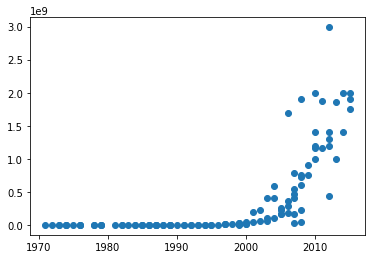

In [16]:
# plot the data
plt.scatter(X, Y)

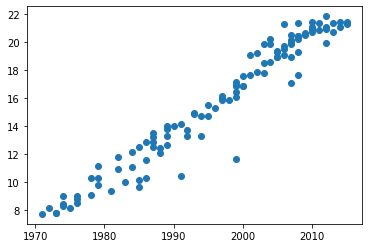

In [17]:
Y = np.log(Y)
plt.scatter(X, Y)

In [18]:
X = X - X.mean()

In [25]:
# create TF model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), 
              loss='mse')

# learning rate scheduler
def schedule(epoch, learning_rate):
    if epoch >= 50:
        return 0.0001
    return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

# train the model
r = model.fit(X, Y, epochs=200, callbacks=[scheduler])

Epoch 1/200
4/4 [==============================] - 0s 1ms/step - loss: 8.7543
Epoch 2/200
4/4 [==============================] - 0s 1ms/step - loss: 8.1378
Epoch 3/200
4/4 [==============================] - 0s 1ms/step - loss: 7.1274
Epoch 4/200
4/4 [==============================] - 0s 1ms/step - loss: 6.0904
Epoch 5/200
4/4 [==============================] - 0s 1ms/step - loss: 5.9017
Epoch 6/200
4/4 [==============================] - 0s 1ms/step - loss: 4.6058
Epoch 7/200
4/4 [==============================] - 0s 1ms/step - loss: 3.6047
Epoch 8/200
4/4 [==============================] - 0s 1ms/step - loss: 3.0588
Epoch 9/200
4/4 [==============================] - 0s 1ms/step - loss: 2.5574
Epoch 10/200
4/4 [==============================] - 0s 1ms/step - loss: 2.1523
Epoch 11/200
4/4 [==============================] - 0s 873us/step - loss: 1.7526
Epoch 12/200
4/4 [==============================] - 0s 1ms/step - loss: 1.4701
Epoch 13/200
4/4 [==============================] - 0s 990u

4/4 [==============================] - 0s 974us/step - loss: 0.0060
Epoch 104/200
4/4 [==============================] - 0s 803us/step - loss: 0.0054
Epoch 105/200
4/4 [==============================] - 0s 797us/step - loss: 0.0051
Epoch 106/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0058
Epoch 107/200
4/4 [==============================] - 0s 877us/step - loss: 0.0052
Epoch 108/200
4/4 [==============================] - 0s 854us/step - loss: 0.0061
Epoch 109/200
4/4 [==============================] - 0s 977us/step - loss: 0.0056
Epoch 110/200
4/4 [==============================] - 0s 802us/step - loss: 0.0054
Epoch 111/200
4/4 [==============================] - 0s 874us/step - loss: 0.0067
Epoch 112/200
4/4 [==============================] - 0s 887us/step - loss: 0.0058
Epoch 113/200
4/4 [==============================] - 0s 720us/step - loss: 0.0065
Epoch 114/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0053
Epoch 115/200
4/4 [===============

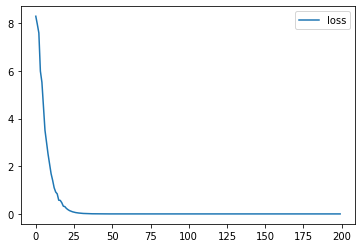

In [28]:
# plot the loss
plt.plot(r.history['loss'], label='loss')
plt.legend()

In [31]:
print(model.layers)
print(model.layers[0].get_weights())

[array([[0.02392721]], dtype=float32), array([2.7138727], dtype=float32)]


In [32]:
X = np.array(X).flatten()
Y = np.array(Y)
denominator = X.dot(X) - X.mean() * X.sum()
a = ( X.dot(Y) - Y.mean()*X.sum() ) / denominator
b = ( Y.mean() * X.dot(X) - X.mean() * X.dot(Y) ) / denominator
print(a, b)
print("Time to double:", np.log(2) / a)

0.02415128506832385 2.7180045335165413
Time to double: 28.70021941271596


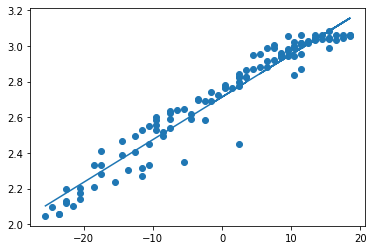

In [42]:
# making predictions
Yhat = model.predict(X).flatten()
plt.scatter(X, Y)
plt.plot(X, Yhat)